**Багров Матвей, 3530901/00201**

# Лабораторная работа №1

## Упражнения 1 и 2

Импортируем нужные библиотеки и файлы, импортируем файл thinkdsp.py необзодимый для работы, скачаем с моего репозитория на github образец звука (небольшой отрывок игры на саксофоне, скачанный с сайта freesound.org)

In [1]:
import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
if not os.path.exists('sax-sound.wav'):
    !wget https://github.com/TheBigBagrovski/telecom-labs/raw/master/resources/sax-sound.wav
from thinkdsp import *

--2023-03-31 17:10:56--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2023-03-31 17:10:56--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.01s   

2023-03-31 17:10:56 (4.67 MB/s) - ‘thinkdsp.py’ saved [48687/48687]

--2023-03-31 17:10:56--  https://github.com/TheBigB

Создадим wave из данного образца звука и выведен график волны

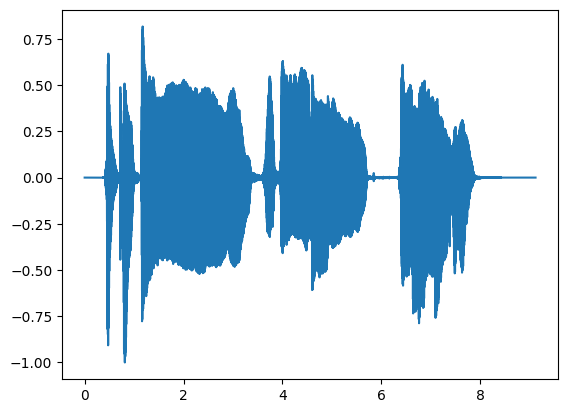

In [3]:
wave = read_wave('sax-sound.wav')
wave.plot()

In [43]:
wave.make_audio()

Выберем полусекундный отрезок с постоянной высотой и выведем его график

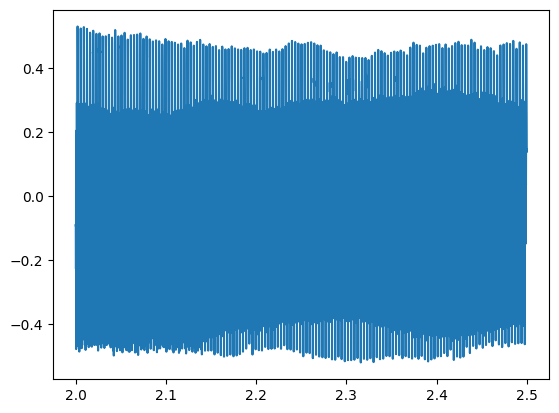

In [5]:
start = 2
duration = 0.5
segment = wave.segment(start, duration)
segment.plot()

In [6]:
segment.make_audio()


Вычислим и распечатаем спектр выделенного сегмента:

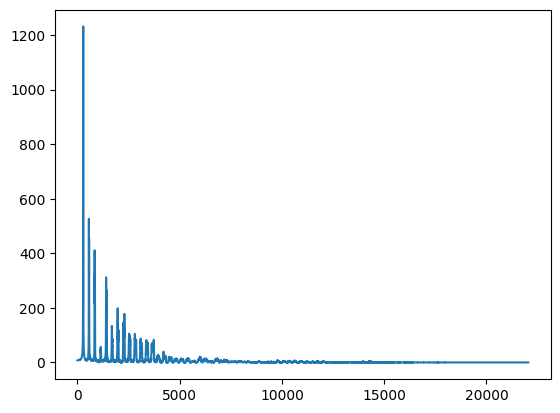

In [7]:
spectrum = segment.make_spectrum()
spectrum.plot()

Полученный график спектр позволяет сделать вывод, что звук локализован примерно в первых 5 кГц. Выведем спектр этого диапазона, а затем приблизим спектрограмму до 3 кГц:

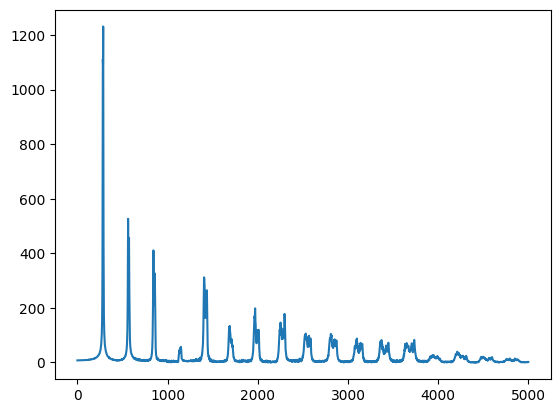

In [8]:
spectrum.plot(high = 5000)

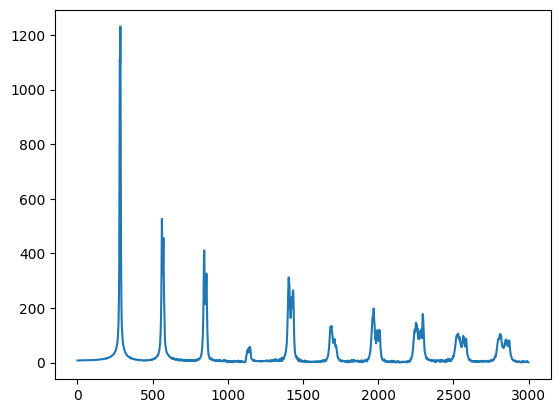

In [9]:
spectrum.plot(3000)

Посмотрим на пики спектра в порядке убывания:

In [10]:
spectrum.peaks()[:10]

[(1231.5420022271844, 286.0),
 (1111.4784976967305, 282.0),
 (1091.354101144325, 284.0),
 (787.6885027668677, 288.0),
 (692.9037001843328, 280.0),
 (526.5921147392052, 562.0),
 (456.7977638847406, 572.0),
 (423.453540933196, 290.0),
 (417.4915842807551, 564.0),
 (410.94334112860906, 844.0)]

Доминирующая частота: 286 Гц

Отфильтруем высокие частоты с помощью low_pass (все что выше 2 кГц):

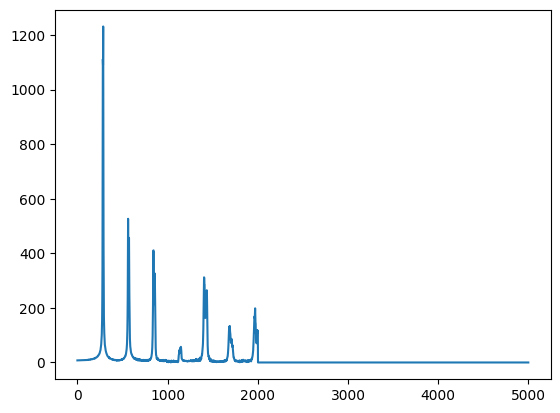

In [11]:
spectrum.low_pass(2000)
spectrum.plot(5000)

In [12]:
filtered = spectrum.make_wave()
filtered.make_audio()

Отфильтрованный от высоких частот звук стал хуже по качеству, более низким, менее наполненным. 

Теперь отфильтруем нижние частоты, используем band_stop и сравним полученный звук с исходным.

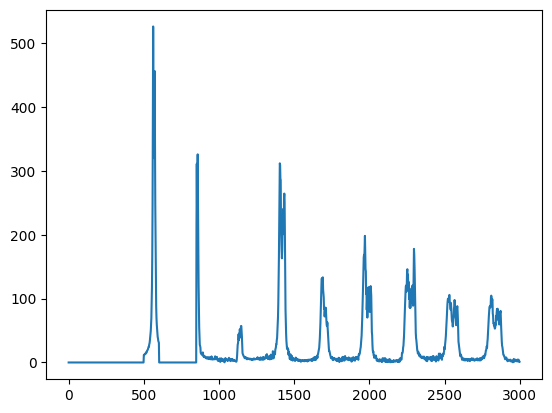

In [13]:
filtered = segment.make_spectrum()
filtered.high_pass(500)
filtered.band_stop(600,850)
filtered.plot(3000)

In [14]:
filtered.make_wave().make_audio()

Звук стал более плоским, более высоким. Проанализируем пики:

In [16]:
filtered.peaks()[:5]

[(526.5921147392052, 562.0),
 (456.7977638847406, 572.0),
 (417.4915842807551, 564.0),
 (393.58377709280717, 570.0),
 (385.23646493203546, 560.0)]

Теперь основная частота: 560 Гц

## Упражнение 3

Построим свой сложный сигнал путем сложения синусоидальных и  косинусоидальных сигналов:

In [33]:
signal = SinSignal(freq=200, amp=1.0) + CosSignal(freq=400, amp=2.0) + SinSignal(freq=600, amp=1.5) + CosSignal(freq=800, amp=2)

Выведем его график:

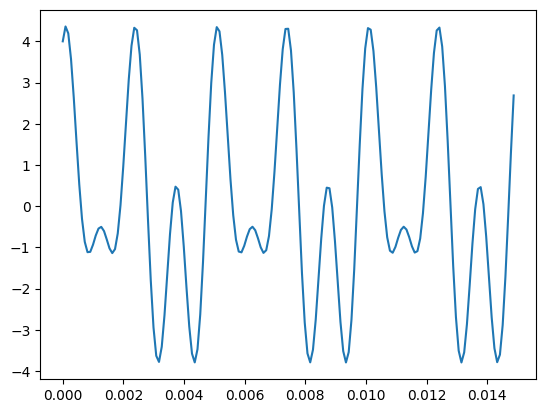

In [34]:
signal.plot()

Сделаем волну из сигнала и получим звук:

In [35]:
wave2 = signal.make_wave(duration=1)
wave2.make_audio()

Все частоты всех компонентов сигнала являются кратными 200 (гармониками). Построим спектр:

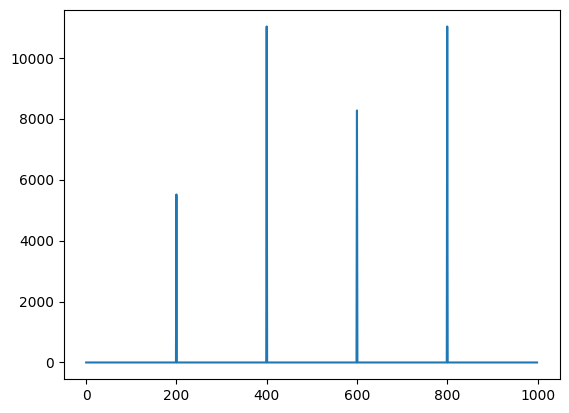

In [36]:
spectrum2 = wave2.make_spectrum()
spectrum2.plot(high = 1000)

Теперь добавим в сигнал компоненту с частотой не кратной основной и проанализируем изменения в звуке.

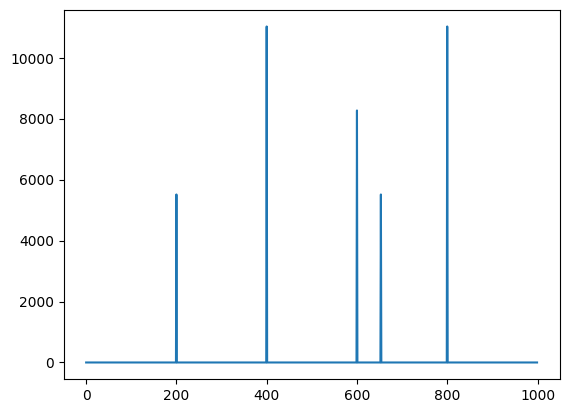

In [37]:
signal += SinSignal(freq=653)
wave3 = signal.make_wave()
wave3.make_spectrum().plot(high=1000)

In [38]:
wave3.make_audio()

Звук становится объемнее, появляется новый различимый "оттенок"

## Упражнение 4

Напишем функцию stretch, берущую wave и коэффициент изменения. Она должна ускорять или замедлять сигнал изменением ts и framerate.

In [39]:
def stretch(wave, stretch_factor):
  wave.framerate *= stretch_factor
  wave.ts /= stretch_factor

Применим ее к нашему образцу звука (ускорим в 2 раза):

In [40]:
wave4 = read_wave('sax-sound.wav')
stretch(wave4, 2)

Построим график:

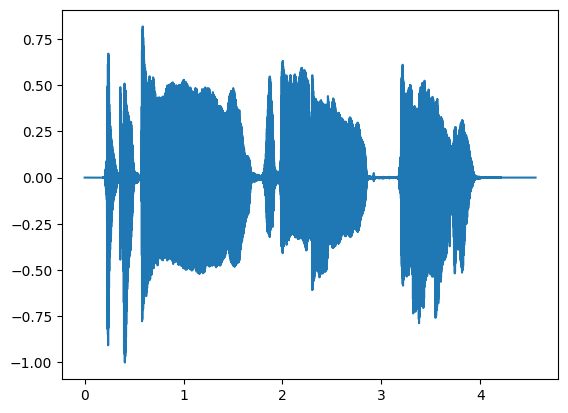

In [41]:
wave4.plot()

Получим следующий звук:

In [42]:
wave4.make_audio()

Теперь замедлим в 2 раза

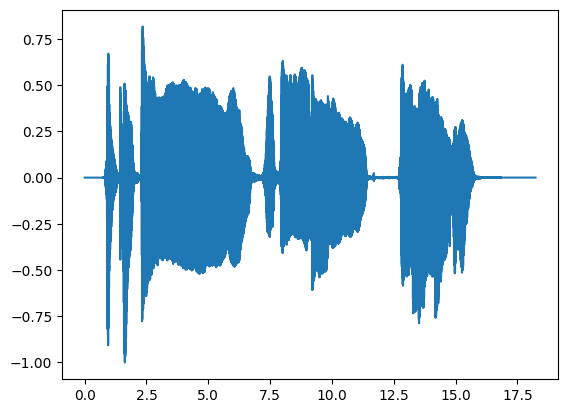

In [ ]:
wave4 = read_wave('sax-sound.wav')
stretch(wave4, 0.5)
wave4.plot()
wave4.make_audio()